In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os
from keras.models import Sequential, save_model, load_model

2023-05-22 16:02:42.986457: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-22 16:02:43.016662: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 16:02:44.084115: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
df = pd.read_pickle("../../data/20230319_RTU_Dataset_PPC-Lab/combined_may2023.pkl")
df.head()

,time,MEM_USAGE,CPU_USAGE,PS1_V,TEMP
0,2023-01-30 12:11:56.788000,35.555417,27.343750,5.435294,28.687
1,2023-01-30 12:16:57.191000,35.555417,6.367041,5.435294,28.687
2,2023-01-30 12:21:57.606000,35.555417,7.142857,5.435294,28.687
3,2023-01-30 12:26:58.001000,35.555417,27.306273,5.435294,28.687
4,2023-01-30 12:31:58.396000,35.555417,5.639098,5.435294,28.687


In [642]:
df.shape

(283, 4)

In [11]:
n_past = 35
n_future = 22 
n_features = 3

In [12]:
df_cleaned = df[["CPU_USAGE", "PS1_V", "MEM_USAGE", "TEMP"]]

In [13]:
df_cleaned.shape

(4602, 4)

In [14]:
X_final_testing = df_cleaned[-(n_past+n_future):-n_future]
y_final_testing = df_cleaned[-n_future:]

In [16]:
scalers={}
training_size = int(df_cleaned.shape[0] * .75) 
testing_size = df_cleaned.shape[0] - training_size
print("train_size", training_size)
print("testing_size", testing_size)
train_df,test_df = df_cleaned[:training_size], df_cleaned[training_size:] 
print("train_df.shape", train_df.shape)

for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(df_cleaned[i].values.reshape(-1,1))
    scalers['scaler_'+ i] = scaler
    
    print(i)
    
    X_final_testing[i] = scaler.transform(X_final_testing[i].values.reshape(-1,1))
    y_final_testing[i] = scaler.transform(y_final_testing[i].values.reshape(-1,1))
    
#     s_s=np.reshape(s_s,len(s_s))
#     X_final_testing[i]=s_s
# test = y_final_testing
# for i in train_df.columns:
#     scaler = scalers['scaler_'+i]
#     s_s = scaler.transform(test[i].values.reshape(-1,1))
#     s_s=np.reshape(s_s,len(s_s))
#     scalers['scaler_'+i] = scaler
#     y_final_testing[i]=s_s

train_size 3451
testing_size 1151
train_df.shape (3451, 4)
CPU_USAGE
PS1_V
MEM_USAGE
TEMP


/tmp/ipykernel_16347/3854819548.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_final_testing[i] = scaler.transform(X_final_testing[i].values.reshape(-1,1))
/tmp/ipykernel_16347/3854819548.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_final_testing[i] = scaler.transform(y_final_testing[i].values.reshape(-1,1))
/tmp/ipykernel_16347/3854819548.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [20]:
X_final_testing = X_final_testing.reshape(1,35,4)
y_final_testing = y_final_testing.reshape(1,22,4)

print("X_final_testing.shape", X_final_testing.shape)
print("y_final_testing.shape", y_final_testing.shape)

X_final_testing.shape (1, 35, 4)
y_final_testing.shape (1, 22, 4)


In [23]:
model_e1d1 = load_model("../../saved_models/seq_to_seq/model_e1d1")
model_e1d1_bi = load_model("../../saved_models/seq_to_seq/model_e1d1_bi")
model_e1d1 = load_model("../../saved_models/seq_to_seq/model_e2d2")

2023-05-22 16:06:38.952827: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2023-05-22 16:06:38.952890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_grad_concat_split_split_dim' with dtype int32
	 [[{{node gradients_split_grad_concat_split_split_dim}}]]
2023-05-22 16:06:38.952927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [650]:
pred_e1d1 = model_e1d1.predict(X_final_testing)
pred_e1d1_bi = model_e1d1_bi.predict(X_final_testing)
pred_e2d2 = model_e2d2.predict(X_final_testing)

1/1 [==============================] - 0s 15ms/step


In [651]:
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    print("Scaling", 'scaler_'+i)
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    pred_e1d1_bi[:,:,index]=scaler.inverse_transform(pred_e1d1_bi[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    y_final_testing[:,:,index]=scaler.inverse_transform(y_final_testing[:,:,index])

Scaling scaler_CPUs
Scaling scaler_MEMs
Scaling scaler_TEMPs


In [652]:
print("pred_e1d1.shape", pred_e1d1.shape)
print("y_final_testing.shape", y_final_testing.shape)
pred_e1d1

pred_e1d1.shape (1, 22, 3)
y_final_testing.shape (1, 22, 3)


array([[[69.87883 , 60.761497, 31.427313],
        [70.82595 , 61.976315, 31.415293],
        [70.97068 , 62.651196, 31.405373],
        [70.68431 , 63.08958 , 31.394583],
        [70.1977  , 63.44848 , 31.38221 ],
        [69.64862 , 63.8012  , 31.36853 ],
        [69.114365, 64.17441 , 31.3542  ],
        [68.63428 , 64.57058 , 31.3399  ],
        [68.224625, 64.98126 , 31.326187],
        [67.88824 , 65.394424, 31.31347 ],
        [67.620605, 65.79833 , 31.301992],
        [67.41371 , 66.18335 , 31.291864],
        [67.2583  , 66.542496, 31.283102],
        [67.145226, 66.87144 , 31.275646],
        [67.0661  , 67.16804 , 31.269394],
        [67.01363 , 67.43195 , 31.264223],
        [66.981674, 67.664154, 31.259998],
        [66.96517 , 67.86643 , 31.256586],
        [66.96005 , 68.04115 , 31.253862],
        [66.963104, 68.19094 , 31.251715],
        [66.97181 , 68.31851 , 31.250042],
        [66.984245, 68.42651 , 31.248755]]], dtype=float32)

In [653]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

results = {}

for metric, metric_name in enumerate(train_df.columns):
    overall_error_e1d1, overall_error_e1d1_bi, overall_error_e2d2 = 0, 0, 0
    print(metric_name)
    for slot in range(0,n_future):
        err_e1d1 = mean_absolute_error(y_final_testing[:,slot-1,metric],pred_e1d1[:,slot-1,metric])
        err_e1d1_bi = mean_absolute_error(y_final_testing[:,slot-1,metric],pred_e1d1_bi[:,slot-1,metric])
        err_e2d2 = mean_absolute_error(y_final_testing[:,slot-1,metric],pred_e2d2[:,slot-1,metric])
        overall_error_e1d1 += err_e1d1
        overall_error_e1d1_bi += err_e1d1_bi
        overall_error_e2d2 += err_e2d2
        #     print("Time slot ",slot,":")
        #     print("MAE-E1D1 : ",err_e1d1 ,end=", ")
        #     print("MAE-E2D2 : ",err_e2d2)
        #     print()
        #     print()
    
    print("overall_error_e1d1 mae", overall_error_e1d1)
    print("overall_error_e1d1_bi mae", overall_error_e1d1_bi)
    print("overall_error_e2d2 mae", overall_error_e2d2)

    mape_e1_d1 = mean_absolute_percentage_error(y_final_testing[:,:,0].reshape([22]), pred_e1d1[:,:,metric].reshape([22]))
    mape_e1_d1_bi = mean_absolute_percentage_error(y_final_testing[:,:,0].reshape([22]), pred_e1d1_bi[:,:,metric].reshape([22]))
    mape_e2_d2 = mean_absolute_percentage_error(y_final_testing[:,:,0].reshape([22]), pred_e2d2[:,:,metric].reshape([22]))

    results[metric_name] = {}
    results[metric_name]["e1d1"] = (overall_error_e1d1, mape_e1_d1)
    results[metric_name]["e1d1_bi"] = (overall_error_e1d1_bi, mape_e1_d1_bi)
    results[metric_name]["e2d2"] = (overall_error_e2d2, mape_e2_d2)
    
    print("overall_error_e1d1 mape", mape_e1_d1)
    print("overall_error_e1d1_bi mape", mape_e1_d1_bi)
    print("overall_error_e2d2 mape", mape_e2_d2)
    print()

CPUs
overall_error_e1d1 mae 180.69636800537114
overall_error_e1d1_bi mae 266.27981832275395
overall_error_e2d2 mae 211.06488302001958
overall_error_e1d1 mape 0.10707996724065909
overall_error_e1d1_bi mape 0.15804125143605469
overall_error_e2d2 mape 0.12518141934999896

MEMs
overall_error_e1d1 mae 63.775428289794924
overall_error_e1d1_bi mae 78.00192779541015
overall_error_e2d2 mae 65.68223057250978
overall_error_e1d1 mape 0.14203869419984383
overall_error_e1d1_bi mape 0.16938456630286441
overall_error_e2d2 mape 0.14763036479381972

TEMPs
overall_error_e1d1 mae 7.854407989501958
overall_error_e1d1_bi mae 8.81882640075684
overall_error_e2d2 mae 7.586665832519536
overall_error_e1d1 mape 0.5903466346512927
overall_error_e1d1_bi mape 0.5900583754423493
overall_error_e2d2 mape 0.590440433822061



In [654]:
print("pred_e1d1.shape", pred_e1d1.shape)
pred_e1d1

pred_e1d1.shape (1, 22, 3)


array([[[69.87883 , 60.761497, 31.427313],
        [70.82595 , 61.976315, 31.415293],
        [70.97068 , 62.651196, 31.405373],
        [70.68431 , 63.08958 , 31.394583],
        [70.1977  , 63.44848 , 31.38221 ],
        [69.64862 , 63.8012  , 31.36853 ],
        [69.114365, 64.17441 , 31.3542  ],
        [68.63428 , 64.57058 , 31.3399  ],
        [68.224625, 64.98126 , 31.326187],
        [67.88824 , 65.394424, 31.31347 ],
        [67.620605, 65.79833 , 31.301992],
        [67.41371 , 66.18335 , 31.291864],
        [67.2583  , 66.542496, 31.283102],
        [67.145226, 66.87144 , 31.275646],
        [67.0661  , 67.16804 , 31.269394],
        [67.01363 , 67.43195 , 31.264223],
        [66.981674, 67.664154, 31.259998],
        [66.96517 , 67.86643 , 31.256586],
        [66.96005 , 68.04115 , 31.253862],
        [66.963104, 68.19094 , 31.251715],
        [66.97181 , 68.31851 , 31.250042],
        [66.984245, 68.42651 , 31.248755]]], dtype=float32)

In [655]:
CPUs_hat_e1d1 = pred_e1d1[:,:,0].reshape([22])
MEMs_hat_e1d1 = pred_e1d1[:,:,1].reshape([22])
TEMPs_hat_e1d1 = pred_e1d1[:,:,2].reshape([22])

CPUs_hat_e1d1_bi = pred_e1d1_bi[:,:,0].reshape([22])
MEMs_hat_e1d1_bi = pred_e1d1_bi[:,:,1].reshape([22])
TEMPs_hat_e1d1_bi = pred_e1d1_bi[:,:,2].reshape([22])

CPUs_hat_e2d2 = pred_e2d2[:,:,0].reshape([22])
MEMs_hat_e2d2 = pred_e2d2[:,:,1].reshape([22])
TEMPs_hat_e2d2 = pred_e2d2[:,:,2].reshape([22])

print("CPUs_hat.shape", CPUs_hat_e1d1.shape[0])
print("[-CPUs_hat.shape[0]:].shape[0]", df[-CPUs_hat_e1d1.shape[0]:].shape[0])

CPUs_hat.shape 22
[-CPUs_hat.shape[0]:].shape[0] 22


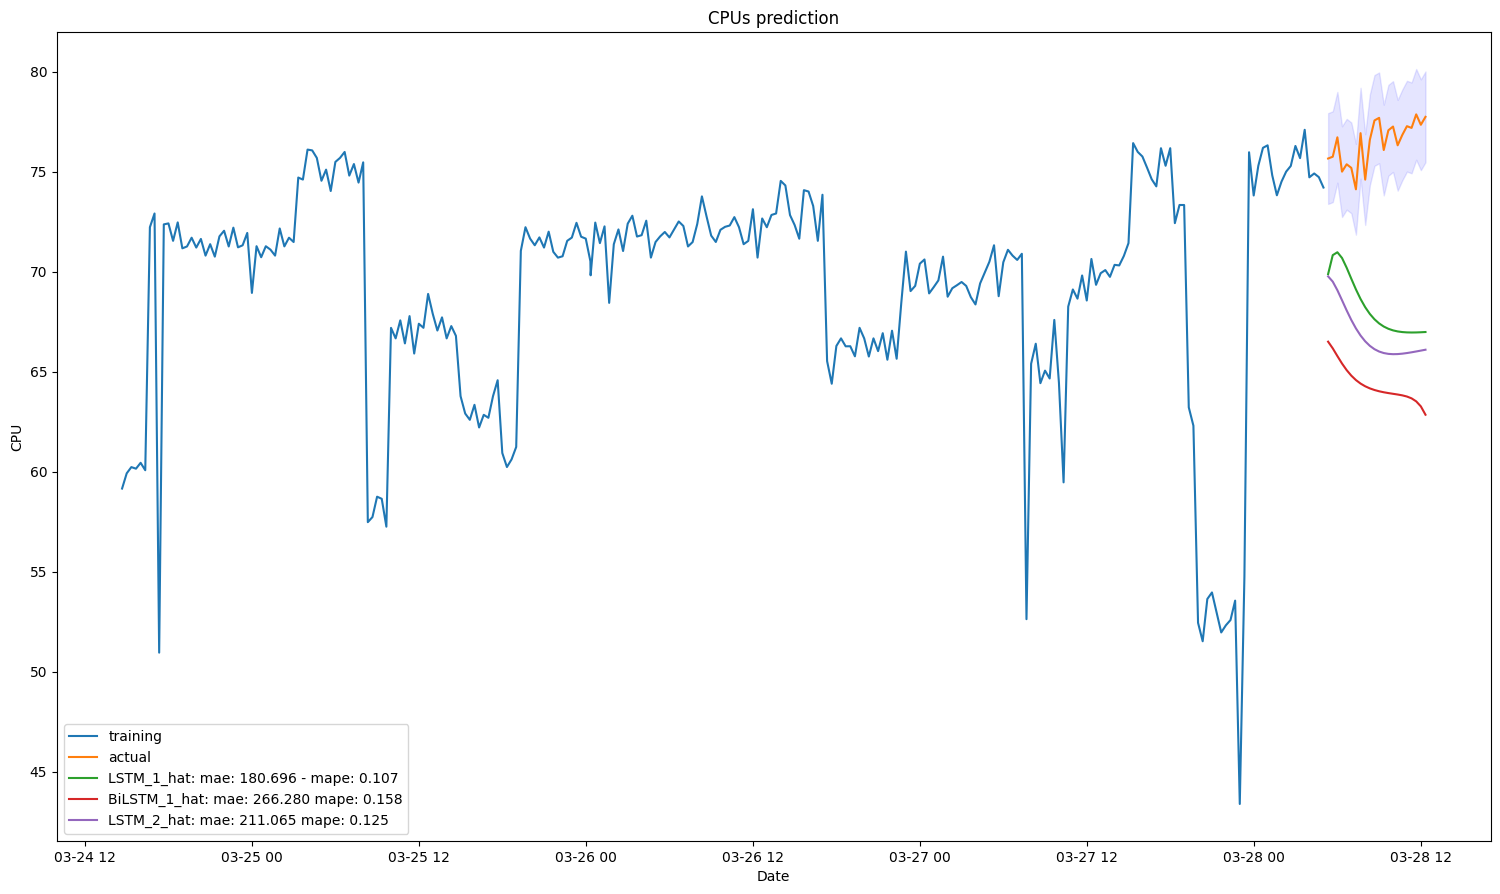

In [656]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5) 

plt.plot(df[:-testing_size]["timestamps"], df[:-testing_size]["CPUs"], label="training")
plt.plot(df[training_size:]["timestamps"], df[training_size:]["CPUs"], label="actual")
plt.plot(df[-CPUs_hat_e1d1.shape[0]:]["timestamps"], CPUs_hat_e1d1, label=f'LSTM_1_hat: mae: {"{:.3f}".format(results["CPUs"]["e1d1"][0])} - mape: {"{:.3f}".format(results["CPUs"]["e1d1"][1])}')
plt.plot(df[-CPUs_hat_e1d1_bi.shape[0]:]["timestamps"], CPUs_hat_e1d1_bi, label=f'BiLSTM_1_hat: mae: {"{:.3f}".format(results["CPUs"]["e1d1_bi"][0])} mape: {"{:.3f}".format(results["CPUs"]["e1d1_bi"][1])}')
plt.plot(df[-CPUs_hat_e2d2.shape[0]:]["timestamps"], CPUs_hat_e2d2, label=f'LSTM_2_hat: mae: {"{:.3f}".format(results["CPUs"]["e2d2"][0])} mape: {"{:.3f}".format(results["CPUs"]["e2d2"][1])}')
ci = 10 * np.std(df[training_size:]["CPUs"])/np.sqrt(len(df[training_size:]["CPUs"]))
plt.fill_between(df[training_size:]["timestamps"], (df[training_size:]["CPUs"]-ci), (df[training_size:]["CPUs"]+ci), color='b', alpha=.1)
plt.xlabel('Date')
plt.ylabel('CPU')
plt.legend(loc='lower left')
plt.title('CPUs prediction')
plt.show()

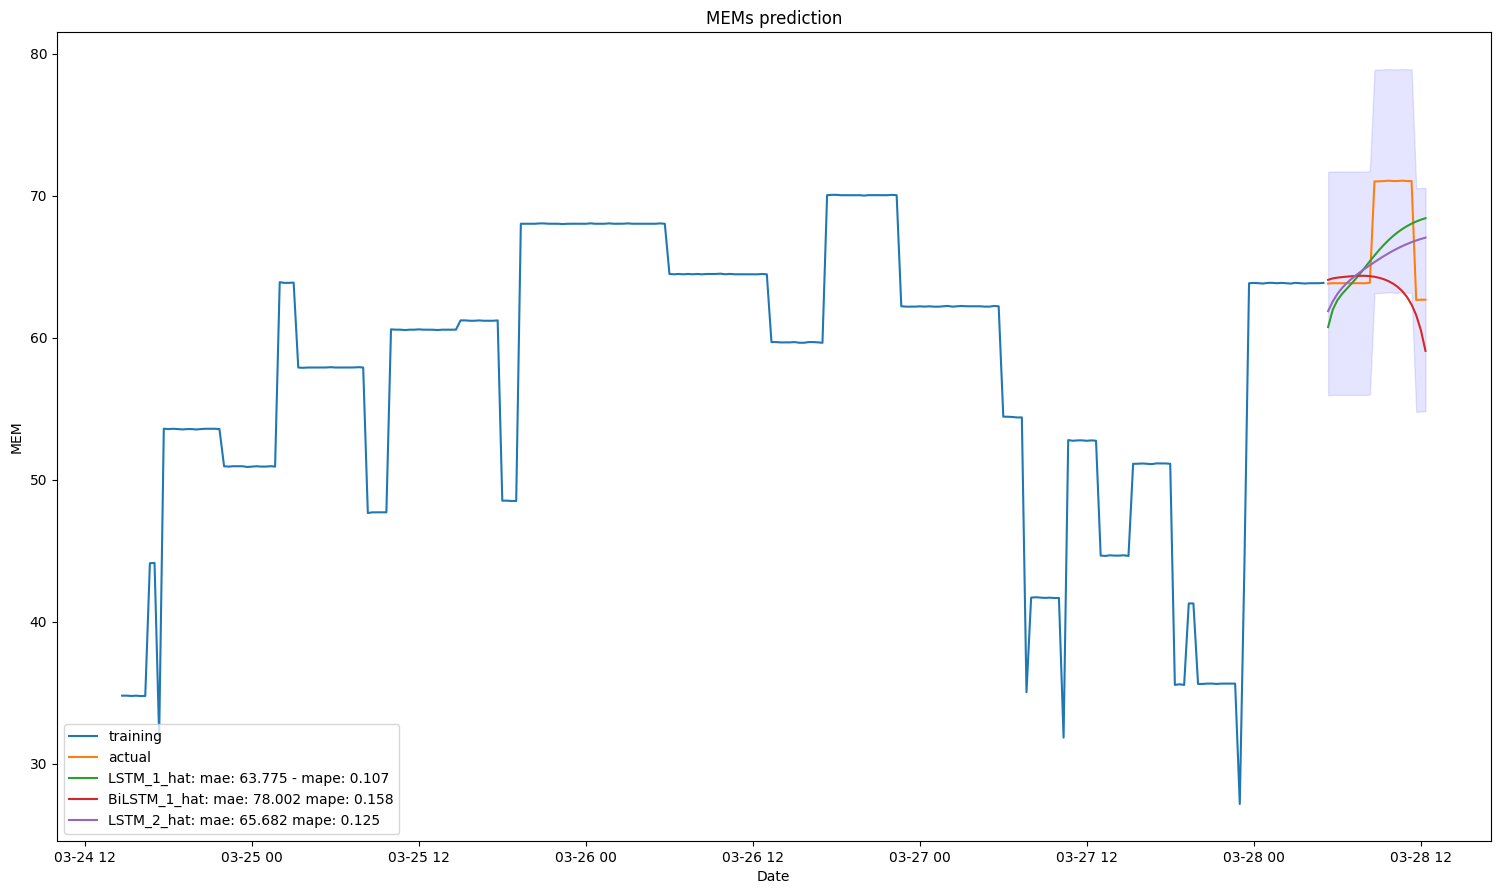

In [657]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5) 


plt.plot(df[:-testing_size]["timestamps"], df[:-testing_size]["MEMs"], label="training")
plt.plot(df[training_size:]["timestamps"], df[training_size:]["MEMs"], label="actual")
plt.plot(df[-CPUs_hat_e1d1.shape[0]:]["timestamps"], MEMs_hat_e1d1, label=f'LSTM_1_hat: mae: {"{:.3f}".format(results["MEMs"]["e1d1"][0])} - mape: {"{:.3f}".format(results["CPUs"]["e1d1"][1])}')
plt.plot(df[-CPUs_hat_e1d1_bi.shape[0]:]["timestamps"], MEMs_hat_e1d1_bi, label=f'BiLSTM_1_hat: mae: {"{:.3f}".format(results["MEMs"]["e1d1_bi"][0])} mape: {"{:.3f}".format(results["CPUs"]["e1d1_bi"][1])}')
plt.plot(df[-CPUs_hat_e2d2.shape[0]:]["timestamps"], MEMs_hat_e2d2, label=f'LSTM_2_hat: mae: {"{:.3f}".format(results["MEMs"]["e2d2"][0])} mape: {"{:.3f}".format(results["CPUs"]["e2d2"][1])}')
ci = 10 * np.std(df[training_size:]["MEMs"])/np.sqrt(len(df[training_size:]["MEMs"]))
plt.fill_between(df[training_size:]["timestamps"], (df[training_size:]["MEMs"]-ci), (df[training_size:]["MEMs"]+ci), color='b', alpha=.1)
plt.xlabel('Date')
plt.ylabel('MEM')
plt.legend(loc='lower left')
plt.title('MEMs prediction')
plt.show()

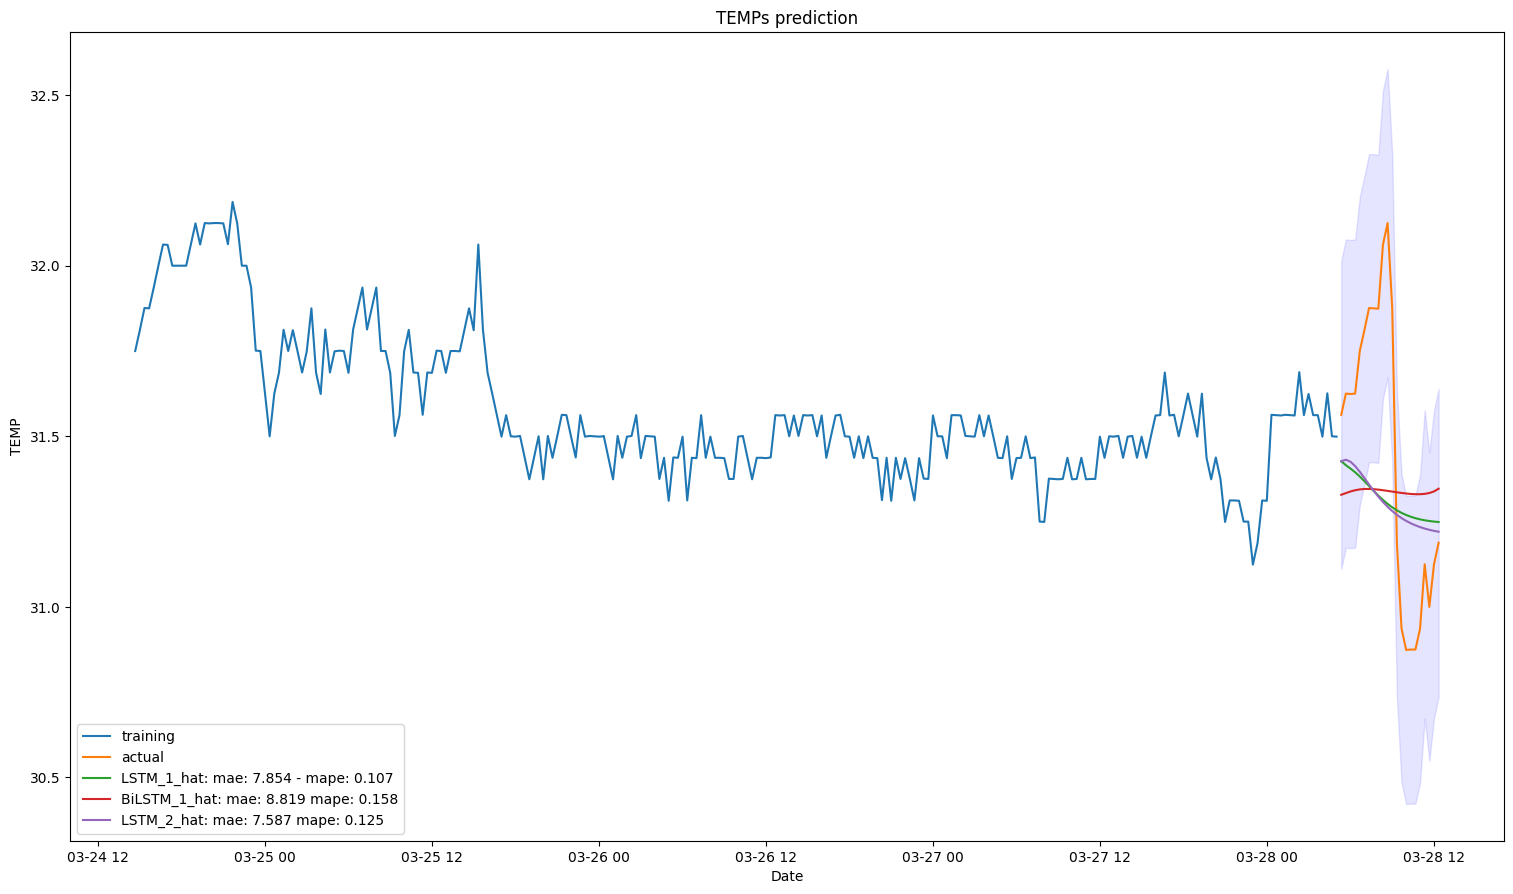

In [658]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5) 


plt.plot(df[:-testing_size]["timestamps"], df[:-testing_size]["TEMPs"], label="training")
plt.plot(df[training_size:]["timestamps"], df[training_size:]["TEMPs"], label="actual")
plt.plot(df[-CPUs_hat_e1d1.shape[0]:]["timestamps"], TEMPs_hat_e1d1, label=f'LSTM_1_hat: mae: {"{:.3f}".format(results["TEMPs"]["e1d1"][0])} - mape: {"{:.3f}".format(results["CPUs"]["e1d1"][1])}')
plt.plot(df[-CPUs_hat_e1d1_bi.shape[0]:]["timestamps"], TEMPs_hat_e1d1_bi, label=f'BiLSTM_1_hat: mae: {"{:.3f}".format(results["TEMPs"]["e1d1_bi"][0])} mape: {"{:.3f}".format(results["CPUs"]["e1d1_bi"][1])}')
plt.plot(df[-CPUs_hat_e2d2.shape[0]:]["timestamps"], TEMPs_hat_e2d2, label=f'LSTM_2_hat: mae: {"{:.3f}".format(results["TEMPs"]["e2d2"][0])} mape: {"{:.3f}".format(results["CPUs"]["e2d2"][1])}')
ci = 5 * np.std(df[training_size:]["TEMPs"])/np.sqrt(len(df[training_size:]["TEMPs"]))
plt.fill_between(df[training_size:]["timestamps"], (df[training_size:]["TEMPs"]-ci), (df[training_size:]["TEMPs"]+ci), color='b', alpha=.1)
plt.xlabel('Date')
plt.ylabel('TEMP')
plt.legend(loc='lower left')
plt.title('TEMPs prediction')
plt.show()